In [163]:
using Pkg
Pkg.add("Latexify");
Pkg.add("LaTeXStrings");
Pkg.add("LinearAlgebra");
Pkg.add("JuMP");
Pkg.add("Clp");
Pkg.add("PyPlot");
Pkg.add("NamedArrays")
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("Ipopt");

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/

In [162]:
println("Homework 7 - Jacob Lorenz")

Homework 7 - Jacob Lorenz


# Problem 1 - Moving Averages

**There are many ways to model the relationship between and input sequence ${u_1, u_2, \dots}$ and an output sequence ${y_1, y_2, \dots}$. In class, we saw the moving average (MA) model, where each output is approximated by a linear combination of the $k$ most recent inputs:**

$$
    MA: \;\;\;\;\; y_t \approx b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1}
$$

**We then used least-squares to find the coefficients $b_1, \dots, b_k$. What if we didn’t have access to the inputs at all, and we were asked to predict future y values based only on the previous y values? One way to do this is by using an autoregressive (AR) model, where each output is approximated by a linear combination of the $l$ most recent outputs (excluding the present one):**

$$
    AR: \;\;\;\;\; y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_ly_{t-l}
$$

**Of course, if the inputs contain pertinent information, we shouldn't expect the AR method to outperform the MA method.**

**a) Using the uy_daya.csv file from class, plot the true $y$, and on the same axes, plot the estimated $\hat{y}$ using the MA model and the estimated $\hat{y}$ using the AR model. Use $k=5$ for both models. To quantify the differences between estimates, also compute $\|y-\hat{y}\|$ for both cases.**

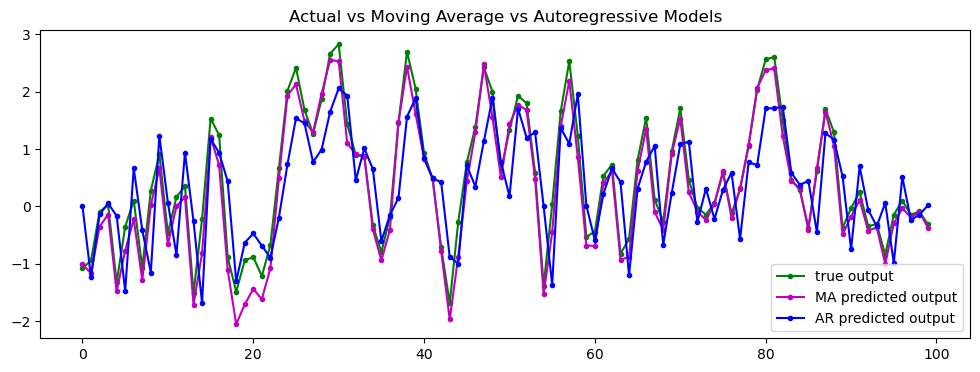


Actual vs Moving Average Norm:
2.460854388269911
Actual vs Autoregressive Norm:
7.436691765656793


In [159]:
using CSV, DataFrames, LinearAlgebra, PyPlot, JuMP, Ipopt, Gurobi

raw = CSV.read("uy_data.csv", header=0, DataFrame);

u = raw[:, 1];
y = raw[:, 2];
T = length(u)

function movingAverage(K)
    width = K
    
    A = zeros(T,width)
    for i = 1:width
        A[i:end,i] = u[1:end-i+1]
    end
    
    wopt = A\y
    yest = A*wopt
    return (wopt, yest)
end

function autoregressive(K)
    newY = [0; y]
    width = K
    
    A = zeros(T,width)
    for i = 1:width
        A[i:end,i] = newY[1:end-i]
    end
    
    wopt = A\y
    yest = A*wopt
    return (wopt, yest)
end

K = 5
(ma_coeffs, y_est_ma) = movingAverage(K)
(ar_coeffs, y_est_ar) = autoregressive(K)

figure(figsize=(12,4))
# plot(y,"g.-",y_est_ma,"m.-",y_est_ar,"r.-")
plot(y,"g.-",y_est_ma,"m.-",y_est_ar,"b.-")
legend(["true output", "MA predicted output", "AR predicted output"], loc="lower right");
title("Actual vs Moving Average vs Autoregressive Models");
println()
println("Actual vs Moving Average Norm:")
println(norm(y_est_ma-y))
println("Actual vs Autoregressive Norm:")
println(norm(y_est_ar-y))

**b) Yet another possible modeling choice is to combine both AR and MA. Unsurprisingly, this is called the autoregressive moving average model (ARMA):**

$$
    ARMA: \;\;\;\;\; y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_ly_{t-l} + b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1}
$$

**Solve the problem once more, this time using an ARMA model with $k=l=1$. Plot $y$ and $\hat{y}$ as before, and also compute the error $\|y-\hat{y}\|$.**

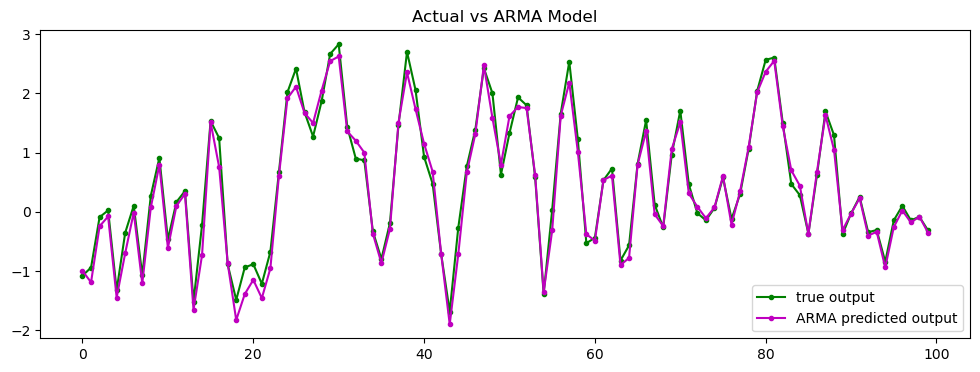


Actual vs ARMA Norm:
1.8565828148734604


In [158]:
function arma(K)
    width = K
    
    newY = [0; y]
    
    A = zeros(T,width*2)
    for i = 1:width
        A[i:end,i] = newY[1:end-i]
        A[i:end,width+i] = u[1:end-i+1]
    end
    
    wopt = A\y
    y_est = A*wopt
    return (wopt,y_est)
end

K = 1
(arma_coeffs, y_est_arma) = arma(K)

figure(figsize=(12,4))
plot(y,"g.-",y_est_arma,"m.-")
legend(["true output", "ARMA predicted output"], loc="lower right");
title("Actual vs ARMA Model");
println()
println("Actual vs ARMA Norm:")
println(norm(y_est_arma-y))

In conclusion, we can see from the results above that the ARMA model performed the best with an error of 1.856583, the Moving Average model performed the second best with an error of 2.46085, and the Autoregressive model performed the worst with an error of 7.43669. 

I think this makes sense. Since the moving average model considers a linear combination of the independent variables, which theoretically have more of a pattern to the determination of corresponding y values than strictly using previous y values, it should definitely outperform the autoregressive model. The autoregressive model uses a linear combination of the previous y values to predict a future y value; however, this is just softening the peaks since the dependency "should" rely more on the values of u, not y. The previous y values; however, despite being "irrelevant" to future y values, are still pieces of information. And when the ARMA model considers the linear combination of K independent variables as well as the information contained in previous y values, it is strictly using more information in its formulation. Since it considers more information than the other models, it makes sense that it outperforms the others individually. 

An anecdotal saying in stock market trading: "Past performance does not guarentee future results", is a good summation of these results. Past performance of the y values does not guarentee a similar outcome in future y values; however, it is still information that can be factored in. The fundamentals of a given company at a particular time act as the independent variables for the company's current valuation and carry more weight than how the company performed in the past with different fundamentals. However, as we see with the ARMA model, factoring past performance in with current fundamentals has the potential to provide a better future value prediction than isolating either piece of information. 

"Information is the resolution of uncertainty." - Claude Shannon, Mathematician, (1916 - 2001, R.I.P.)

# Problem 2 - The Huber Loss

**In statistics, we frequently encounter data sets containing outliers, which are bad data points arising from experimental error or abnormally high noise. Consider for example the data set of 15 pairs ($x,y$) on the homework writeup.**

**The $y$ values corresponding to $x = 3$ and $x = 12$ are outliers, because they are far outside the expected range of values for this experiment.**

**a) Compute the best linear fit to the data using an $l_2$ cost (least squares). In other words, we are looking for the $a$ and $b$ that minimizes the expression:**

$$
    l_2 cost: \;\;\;\;\;\;\; \sum_{i=1}^{15} {(y_i - ax_i - b)^2}
$$

**Repeat the linear fit computation but this time exclude the outliers from the data set. On a single plot, show the data points and both linear fits. Explain the differences between the two fits.**

In [142]:
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02];
x = 1:15;

function computeL2WithOutliers()
    model_huber_L2 = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model_huber_L2, "OutputFlag", 0);

    @variable(model_huber_L2, a)
    @variable(model_huber_L2, b)

    @expression(model_huber_L2, L2Cost, sum((y[i] - a*x[i] - b)^2  for i in 1:size(x,1)))

    @objective(model_huber_L2, Min, L2Cost)
    optimize!(model_huber_L2)

    a = value.(a)
    b = value.(b)
    obj = objective_value(model_huber_L2)
    return(a,b,obj) 
end

function computeL2WithoutOutliers()
    model_huber_L2 = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model_huber_L2, "OutputFlag", 0);

    @variable(model_huber_L2, a)
    @variable(model_huber_L2, b)

    @expression(model_huber_L2, L2Cost, sum((y[i] - a*x[i] - b)^2  for i in [1,2,4,5,6,7,8,9,10,11,13,14,15]))

    @objective(model_huber_L2, Min, L2Cost)
    optimize!(model_huber_L2)

    a = value.(a)
    b = value.(b)
    obj = objective_value(model_huber_L2)
    return(a,b,obj)   
end

computeL2WithoutOutliers (generic function with 1 method)

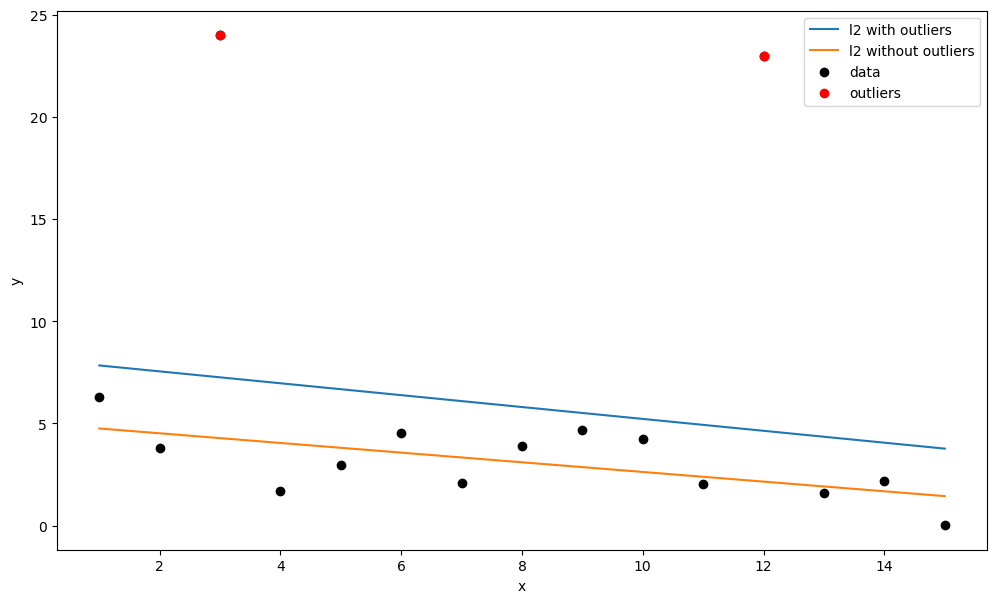

Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01

Stats for L2 fit:
L2 error with outliers:
733.3447871428841
L2 error without outliers:
20.508646748243223


In [122]:
using PyPlot
figure(figsize = (12,7));
scatter(x,y,label="data",color = "black");
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red"); # outliers


(a1,b1,obj1) = computeL2WithOutliers()
(a2,b2,obj2) = computeL2WithoutOutliers()

plot(x, a1*x .+ b1,label="l2 with outliers");
plot(x, a2*x .+ b2,label="l2 without outliers");

# plot(x, a3*x .+ b3,label="l1 with outliers");
# plot(x, a4*x .+ b4,label="l1 without outliers");

# plot(x, a5*x .+ b5,label="Huber with outliers");
# plot(x, a6*x .+ b6,label="Huber without outliers");

legend(loc ="best");
ylabel("y");
xlabel("x");

println()
println("Stats for L2 fit:")
println("=====================================")
println("L2 error with outliers:")
println(obj1)
println("L2 error without outliers:")
println(obj2)

As we can see from the plot above, there is a stark difference between the best linear fits when you include outliers vs exclude them. With outliers included, we see the linear fit sits above the bulk of the points because the outliers bring the error up by a significant amount. Without outliers considered; however, we can see the linear fit does a good job of minimizing the overall error of the remaining collection of points and sits around the central descending line of the data.

Quantitatively, we can see that the error for the L2 cost function with outliers included is 733.345, while the error for the L2 cost function without outliers included is 20.50865

**b) It is not always practical to remove outliers from the data manually, so we will investigate ways of automatically dealing with outliers by changing our cost function. Find the best linear fit again (including outliers) but this time use the $l_1$ cost function:**

$$
    l_1 cost: \;\;\;\;\;\;\; \sum_{i=1}^{15} {|y_i - ax_i - b|}
$$

**Include a plot containing the data and the best $l_1$ linear fit. Does the $l_1$ cost handle outliers better or worse than least squares? Explain why.**

In [38]:
function computeL1WithOutliers()
    model_huber_L1 = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model_huber_L2, "OutputFlag", 0);
    
    @variable(model_huber_L1, a)
    @variable(model_huber_L1, b)
    @variable(model_huber_L1, t[1:size(x,1)])

    for i in 1:size(x,1)
       @constraint(model_huber_L1, t[i] >= y[i] - a*x[i] - b) 
       @constraint(model_huber_L1, t[i] >= -1*(y[i] - a*x[i] - b)) 
    end

    @expression(model_huber_L1, L1Cost, sum(t[i] for i in 1:size(x,1)))

    @objective(model_huber_L1, Min, L1Cost)
    optimize!(model_huber_L1)

    a = value.(a)
    b = value.(b)
    obj = objective_value(model_huber_L1)
    return(a,b,obj)
end

function computeL1WithoutOutliers()
    model_huber_L1 = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model_huber_L2, "OutputFlag", 0);
    
    @variable(model_huber_L1, a)
    @variable(model_huber_L1, b)
    @variable(model_huber_L1, t[1:size(x,1)])

    for i in 1:size(x,1)
       @constraint(model_huber_L1, t[i] >= y[i] - a*x[i] - b) 
       @constraint(model_huber_L1, t[i] >= -1*(y[i] - a*x[i] - b))
    end

    @expression(model_huber_L1, L1Cost, sum(t[i] for i in [1,2,4,5,6,7,8,9,10,11,13,14,15]))

    @objective(model_huber_L1, Min, L1Cost)
    optimize!(model_huber_L1)

    a = value.(a)
    b = value.(b)
    obj = objective_value(model_huber_L1)
    return(a,b,obj)  
end

computeL1WithoutOutliers (generic function with 1 method)

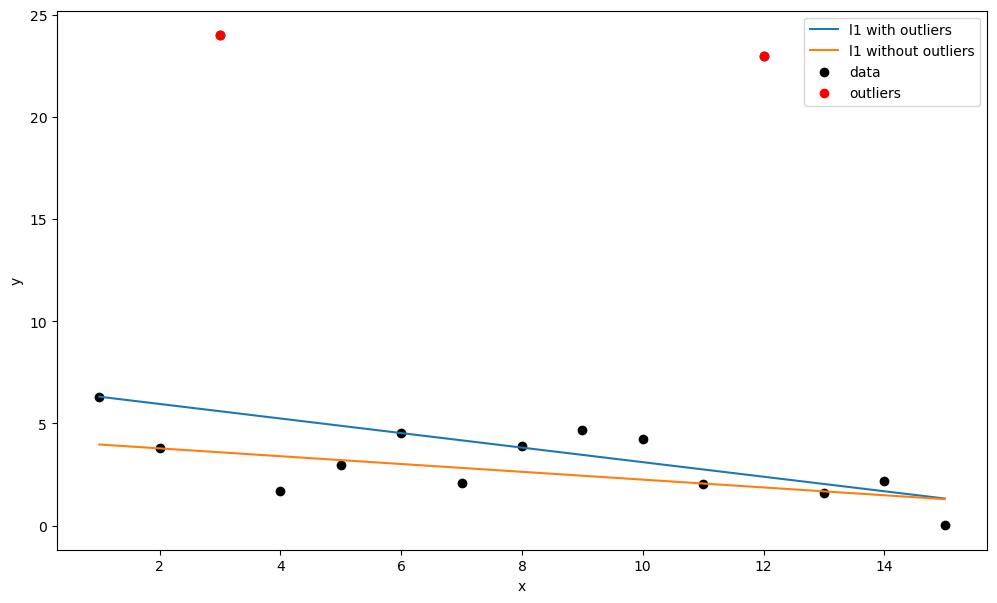

Academic license - for non-commercial use only - expires 2021-05-01
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 30 rows, 17 columns and 90 nonzeros
Model fingerprint: 0x4e0ee579
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 2e+01]
Presolve removed 15 rows and 0 columns
Presolve time: 0.00s
Presolved: 15 rows, 17 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      18    5.4030000e+01   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.00 seconds
Optimal objective  5.403000000e+01

User-callback calls 67, time in user-callback 0.00 sec
Academic license - for non-commercial use only - expires 2021-05-01
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64

In [121]:
using PyPlot
figure(figsize = (12,7));
scatter(x,y,label="data",color = "black");
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red"); # outliers


(a3,b3,obj3) = computeL1WithOutliers()
(a4,b4,obj4) = computeL1WithoutOutliers()

# plot(x, a1*x .+ b1,label="l2 with outliers");
# plot(x, a2*x .+ b2,label="l2 without outliers");

plot(x, a3*x .+ b3,label="l1 with outliers");
plot(x, a4*x .+ b4,label="l1 without outliers");

# plot(x, a5*x .+ b5,label="Huber with outliers");
# plot(x, a6*x .+ b6,label="Huber without outliers");

legend(loc ="best");
ylabel("y");
xlabel("x");

println()
println("Stats for L1 fit:")
println("=====================================")
println("L1 error with outliers:")
println(obj3)
println("L1 error without outliers:")
println(obj4)

From the results in the plot above, it appears that the $l_1$ cost function does a better job of handling outliers than the $l_2$ cost function, and I make that statement based off the visual observation that the best linear fit with outliers included is actually among the grouping of the majority of points, rather than skewed vertically as a result of the outliers.

Why might this be? Well, one thing to notice is that the $l_1$ cost function is not quadratic, and so large distances do not punish the overall objective nearly as much as if the large distances were taken as quadratic distance. As a result, the model has less incentive to reduce the distance between the linear fit and the outliers, and more incentive to reduce the distance between the linear fit and the majority of data points, resulting in a linear fit that fits closer to the majority and ignores the outliers to an extent.

**c) Another approach is to use a $l_2$ penalty for points that are close to the line but an $l_1$ penalty for points that are far away. Specifically, we will use something called the Huber Loss, defined as:**

$$
    \phi(x) = x^2 \;\;\;\; \text{if} -M \leq x \leq M \\
    \;\;\;\;\; \phi(x) = 2M|x|-M^2 \;\;\;\; \text{otherwise}
$$

**Here, $M$ is a parameter that determines where the quadratic function transitions to a linear function. The plot in the homework writeup shows what the Huber Loss function looks like for $M = 1$. The formula above is simple, but not in a form that is very useful for us. As it turns out, we can evaluate the Huber loss function at any point $x$ by solving the following convex QP instead:**

$$
    \phi(x) = \min_{v,w} w^2 + 2Mv \\
    \text{subject to:} \\
    |x| \leq w + v \\
    v \geq 0, w \leq M
$$

**Verify this fact by solving the above QP with $M = 1$ for many values of $x$ in the interval $-3 \leq x \leq 3$ and reproducing the plot from the homework writeup. Finally, find the best linear fit to our data by using a Huber loss with $M = 1$ and produce a plot showing your fit. The cost function is:**

$$
    \text{Huber Loss:} \;\;\;\;\;\; \sum_{i=1}^{15} {\phi(y_i - ax_i - b)}
$$

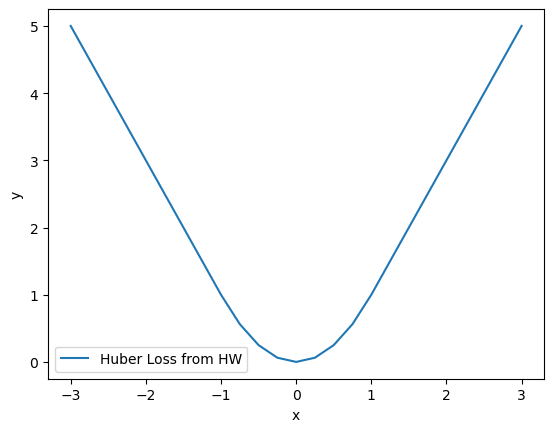

Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only -

In [161]:
using JuMP, Gurobi

function computePhi(M,X)
    model_phi = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model_phi, "OutputFlag", 0);
    
    @variable(model_phi, w)
    @variable(model_phi, v >= 0)
    @variable(model_phi, b)
    @variable(model_phi, M == M)
    
    @constraint(model_phi, X <= w + v)
    @constraint(model_phi, -1*X <= w + v)
    @constraint(model_phi, w <= M)
    
    @objective(model_phi, Min, w^2 + 2*M*v)
    optimize!(model_phi)
    return(objective_value(model_phi))
end

testValues = [-3, -2.75, -2.5, -2.25, -2, -1.75, -1.5, -1.25, -1, -.75, -.5, -.25, 0, .25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
testy = zeros(size(testValues,1))
for i in 1:size(testValues,1)
    curY = computePhi(1,testValues[i])
    testy[i] = curY
end

plot(testValues,testy,label="Huber Loss from HW")
legend(loc ="best");
ylabel("y");
xlabel("x");

In [124]:
function findLinearFitWithHuberLossCostWithOutliers(M)
    model_huberLoss = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model_huberLoss, "OutputFlag", 0)
    
    @variable(model_huberLoss, a)
    @variable(model_huberLoss, b)
    @variable(model_huberLoss, w[1:15])
    @variable(model_huberLoss, v[1:15] >= 0)
    @variable(model_huberLoss, M == M)
    
    for i in 1:15
        @constraint(model_huberLoss, (y[i] - a*x[i] - b) <= w[i] + v[i])
        @constraint(model_huberLoss, -1*(y[i] - a*x[i] - b) <= w[i] + v[i])
        @constraint(model_huberLoss, w[i] <= M)
    end
    
    @objective(model_huberLoss, Min, sum(w[i]^2 + 2*M*v[i] for i in 1:15))
    
    optimize!(model_huberLoss)
    return(value.(a), value.(b), objective_value(model_huberLoss))
end

function findLinearFitWithHuberLossCostWithoutOutliers(M)
    model_huberLoss = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model_huberLoss, "OutputFlag", 0)
    
    @variable(model_huberLoss, a)
    @variable(model_huberLoss, b)
    @variable(model_huberLoss, w[1:15])
    @variable(model_huberLoss, v[1:15] >= 0)
    @variable(model_huberLoss, M == M)
    
    for i in 1:15
        @constraint(model_huberLoss, (y[i] - a*x[i] - b) <= w[i] + v[i])
        @constraint(model_huberLoss, -1*(y[i] - a*x[i] - b) <= w[i] + v[i])
        @constraint(model_huberLoss, w[i] <= M)
    end
    
    @objective(model_huberLoss, Min, sum(w[i]^2 + 2*M*v[i] for i in [1,2,4,5,6,7,8,9,10,11,13,14,15]))
    optimize!(model_huberLoss)
    return(value.(a), value.(b), objective_value(model_huberLoss))
end

findLinearFitWithHuberLossCostWithoutOutliers (generic function with 2 methods)

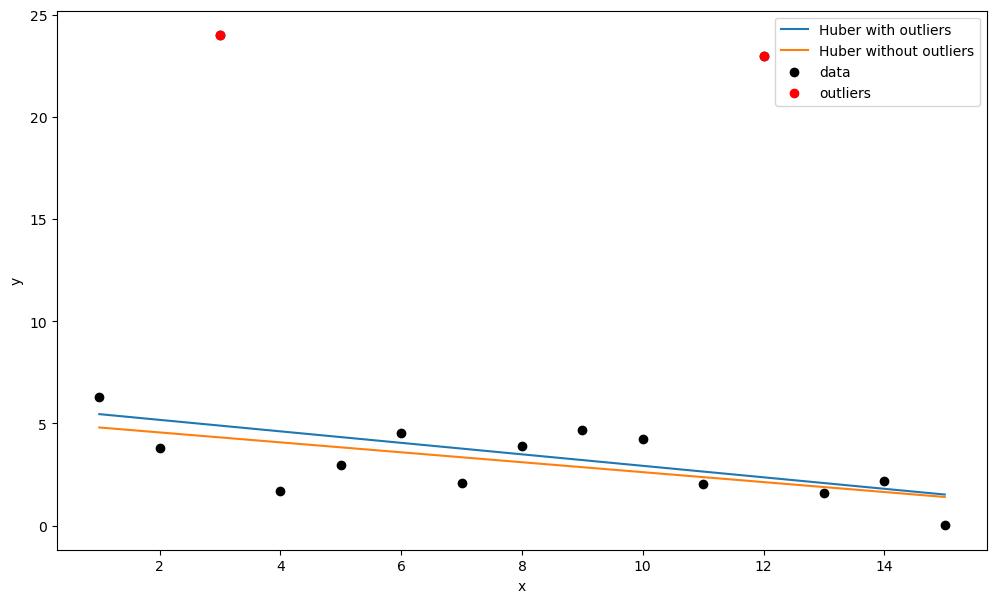

Academic license - for non-commercial use only - expires 2021-05-01
Academic license - for non-commercial use only - expires 2021-05-01

Stats for Huber Loss Cost fit:
Huber Loss error with outliers:
95.49973768346143
Huber Loss without outliers:
17.141219438802686


In [143]:
M = 1
(a5,b5,obj5) = findLinearFitWithHuberLossCostWithOutliers(M)
(a6,b6,obj6) = findLinearFitWithHuberLossCostWithoutOutliers(M)

figure(figsize = (12,7));
scatter(x,y,label="data",color = "black");
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red"); # outliers

plot(x, a5*x .+ b5,label="Huber with outliers");
plot(x, a6*x .+ b6,label="Huber without outliers");

legend(loc ="best");
ylabel("y");
xlabel("x");

println()
println("Stats for Huber Loss Cost fit:")
println("=====================================")
println("Huber Loss error with outliers:")
println(obj5)
println("Huber Loss without outliers:")
println(obj6)

In [149]:
totalL2Error = 0;
totalL1Error = 0;
totalHuberError = 0;
for i in 1:15
    totalL2Error += (y[i] - a1*x[i] + b1)^2
    totalL1Error += (y[i] - a3*x[i] + b3)^2
    totalHuberError += (y[i] - a5*x[i] + b5)^2
end

totalL2Error = sqrt(totalL2Error)
totalL1Error = sqrt(totalL1Error)
totalHuberError = sqrt(totalHuberError)

totalL2Error4 = 0;
totalL1Error4 = 0;
totalHuberError4 = 0;
for i in [1,2,4,5,6,7,8,9,10,11,13,14,15]
    totalL2Error4 += (y[i] - a1*x[i] + b1)^2
    totalL1Error4 += (y[i] - a3*x[i] + b3)^2
    totalHuberError4 += (y[i] - a5*x[i] + b5)^2
end

totalL2Error4 = sqrt(totalL2Error4)
totalL1Error4 = sqrt(totalL1Error4)
totalHuberError4 = sqrt(totalHuberError4)

totalL2Error2 = 0;
totalL1Error2 = 0;
totalHuberError2 = 0;
for i in 1:15
    totalL2Error2 += (y[i] - a2*x[i] + b2)^2
    totalL1Error2 += (y[i] - a4*x[i] + b4)^2
    totalHuberError2 += (y[i] - a6*x[i] + b6)^2
end

totalL2Error2 = sqrt(totalL2Error2)
totalL1Error2 = sqrt(totalL1Error2)
totalHuberError2 = sqrt(totalHuberError2)

totalL2Error3 = 0;
totalL1Error3 = 0;
totalHuberError3 = 0;
for i in [1,2,4,5,6,7,8,9,10,11,13,14,15]
    totalL2Error3 += (y[i] - a2*x[i] + b2)^2
    totalL1Error3 += (y[i] - a4*x[i] + b4)^2
    totalHuberError3 += (y[i] - a6*x[i] + b6)^2
end

totalL2Error3 = sqrt(totalL2Error3)
totalL1Error3 = sqrt(totalL1Error3)
totalHuberError3 = sqrt(totalHuberError3)

println("Eucliden Error with Outliers in Model and Euclidean Distance")
print("L2 Cost model: ")
println(totalL2Error)
print("L1 Cost model: ")
println(totalL1Error)
print("Huber Loss Cost model: ")
println(totalHuberError)
println()
println("Eucliden Error with Outliers in Model but not in Euclidean Distance")
print("L2 Cost model: ")
println(totalL2Error4)
print("L1 Cost model: ")
println(totalL1Error4)
print("Huber Loss Cost model: ")
println(totalHuberError4)
println()
println("Eucliden Error without Outliers in Model")
print("L2 Cost model: ")
println(totalL2Error2)
print("L1 Cost model: ")
println(totalL1Error2)
print("Huber Loss Cost model: ")
println(totalHuberError2)
println()
println("Eucliden Error without Outliers in Model and Euclidean Distance")
print("L2 Cost model: ")
println(totalL2Error3)
print("L1 Cost model: ")
println(totalL1Error3)
print("Huber Loss Cost model: ")
println(totalHuberError3)

Eucliden Error with Outliers in Model and Euclidean Distance
L2 Cost model: 68.55244368287865
L1 Cost model: 65.2238641909539
Huber Loss Cost model: 59.88522225332451

Eucliden Error with Outliers in Model but not in Euclidean Distance
L2 Cost model: 49.109454101167266
L1 Cost model: 45.77464210673852
Huber Loss Cost model: 40.247633687181846

Eucliden Error without Outliers in Model
L2 Cost model: 56.113737646979494
L1 Cost model: 52.13626651784488
Huber Loss Cost model: 56.47668393532214

Eucliden Error without Outliers in Model and Euclidean Distance
L2 Cost model: 36.278727294229725
L1 Cost model: 32.01294082471827
Huber Loss Cost model: 36.66488921925678


In conclusion, we have the following results.

For the linear fits including outliers, we have:
- $L_2$ cost = 733.3447871428841
- $L_1$ cost = 54.03
- Huber Loss cost = 95.49973768346143

For the linear fits excluding outliers, we have:
- $L_2$ cost = 20.508646748243223
- $L_1$ cost = 14.00222222222222
- Huber Loss cost = 17.141219438802686

However, these were the costs from each of the different models. I was a little uncertain whether these would be fair comparisons, so to even the plane, I decided to calculate the total Euclidean Distance between the points and each final linear fit for all cases of outlier inclusion and exclusion, and I got the following results:

For the linear fits including outliers in the determination of the optimal linear parameters as well as calculation of Euclidean Distance, we have the following Euclidean Distances:
- $L_2$ Distance = 68.55244368287865
- $L_1$ Distance = 65.2238641909539
- Huber Loss Distance = 59.88522225332451

For the linear fits including outliers in the determination of the optimal linear parameters but excluded in the calculation of Euclidean Distance, we have the following Euclidean Distances:
- $L_2$ Distance = 49.109454101167266
- $L_1$ Distance = 45.77464210673852
- Huber Loss Distance = 40.247633687181846

For the linear fits excluding outliers in the determination of the optimal linear parameters but including them in the Euclidean Distance calculation, we have the following Euclidean Distances:
- $L_2$ Distance = 56.113737646979494
- $L_1$ Distance = 52.13626651784488
- Huber Loss Distance = 56.47668393532214

For the linear fits excluding outliers in the determination of the optimal linear parameters as well as the calculation of the total Euclidean Distance, we have the following Euclidean Distances:
- $L_2$ Distance = 36.278727294229725
- $L_1$ Distance = 32.01294082471827
- Huber Loss Distance = 36.66488921925678

To summarize, if we include the outliers in our determination of the parameters for the best linear fit, we see that the Huber Loss performs the best, followed by $L_1$ and then $L_2$. Which again makes sense, since the $L_2$ cost is quadratic and penalizes the outliers more, hence the non-outliers have a larger gap to the ideal line resulting in a higher total Euclidean Distance. It is not always practical or wise to remove outliers from your data set, and so in these cases using a Huber Loss cost optimization model does the best job of smoothing out the data and providing a good fit. If we do not include outliers in our determination of the parameters for the best linear fit; however, we see that the $L_1$ cost function model performs the best when we calculate the total Euclidean Distance with and without the outliers, followed by the $L_2$ model, and finally the Huber Loss model. There is no question that if we are able to remove the outliers from the dataset, the $L_1$ cost model performs the best. Why? Well, we see that the $L_1$ cost does not get harshly penalized for points off the line, so it has incentive to fit the line on as many points as possible to reduce the Euclidean cost contribution. The $L_2$ cost; however, penalizes more for larger distances and as such optimizes the line to be a medium among all the points instead of fit to a few in particular. Since outliers are not included, the Huber Loss essentially mimics the $L_2$ fit, with a few differences.

One final thing to note is the difference in Euclidean Distance between inclusion and exclusion of outliers within the same model. In both cases of outlier inclusion and exclusion for model optimization, where the Euclidean Distance is then calculated with and without outliers after obtaining the optimal parameters, we can see that Huber Loss has the smallest gap of 3.41 and 3.58 compared to difference magnitudes of $10^1$ for the other two models. This tells me that the Huber Loss's primary function is to smooth out the data with or without outliers, and performs concistently in either case.

# Problem 3 - Heat Pipe Design

**A heated fluid at temperature $T$ (degrees above ambient temperature) flows in a pipe with fixed length and curcular cross section with radius $r$. A layer of insulation, with thickness $w$. surrounds the pipe to reduce heat loss through the pipe walls ($w$ is much smaller than $r$). The design variables in this problem are $T$, $r$, and $w$.**

**The energy cost due to heat loss is roughly equal to $\alpha_1Tr/w$. The cost of the pipe, which has a fixed wall thickness, is approximately proportional to the total material, i.e., given by $\alpha_2r$. The cost of the insulation is also approximately proportional to the total insulation material, i.e., roughly $\alpha_3rw$. The total cost is the sum of these three costs.**

**The heat flow down the pipe is entirely due to the flow of the liquid, which has a fixed velocity, i.e., it is given by $\alpha_4Tr^2$. The costants, $\alpha_i$ are all positive, as are the variables $T$, $r$, and $w$.**

**Now the problem: maximize the total heat flow down the pipe subject to an upper limit $C_{max}$ on total cost, and the constraints**

$$
    T_{min} \leq T \leq T_{max} \\
    r_{min} \leq r \leq r_{max} \\
    w_{min} \leq w \leq w_{max} \\
    w \leq 0.1r
$$

**a) Express this problem as a geometric program, and convert it into a convex optimization problem.**

To express this as a geometric program, we can first convert the maximization objective to a minimization, and subsequently manipulate the constrints such that they all have an upper bound of 1.

$$
    \min_{T,w,r \gt 0} a_4^{-1} * T^{-1} * r^{-2} \\
    \text{subject to:} \\
    T_{min} * T^{-1} \leq 1 \\
    \frac{1}{T_{max}} * T \leq 1 \\
    r_{min} * r^{-1} \leq 1 \\
    \frac{1}{r_{max}} * r \leq 1 \\
    w_{min} * w^{-1} \leq 1 \\
    \frac{1}{w_{max}} * w \leq 1 \\
    \frac{1}{0.1 * r} * w \leq 1 \\
    \frac{a_1*T*r}{w*C_{max}} + \frac{a_2*r}{C_{max}} + \frac{a_3*r*w}{C_{max}} \leq 1 \\
    a_i \gt 0 \;\;\;\; \forall i \in [1,4] \\
    T,r,w \gt 0
$$

To begin the conversion to a convex optimization problem, we will first define a new set of variables, $x,y,z$ such that 

$$
    x = log(T) \\
    y = log(r) \\
    z = log(w)
$$

We can then do the conversion and express the problem in terms of the new variables, $x,y,z$ to arrive at a convex optimization problem.

$$
    \min_{x,y,z} \; log(e^{log(\frac{1}{a_1})-x-y^2}) \\
    \text{subject to:} \\
    log(e^{log(T_{min})-x}) \leq 0 \\
    log(e^{log(\frac{1}{T_{max}}) + x}) \leq 0 \\
    log(e^{log(r_{min})-y}) \leq 0 \\
    log(e^{log(\frac{1}{r_{max}}) + y}) \leq 0 \\
    log(e^{log(w_{min})-z}) \leq 0 \\
    log(e^{log(\frac{1}{w_{max}}) + z}) \leq 0 \\
    log(e^{log(10) - y + z}) \leq 0 \\
    log(e^{log(\frac{a_1}{C_{max}})+x+y-z} + e^{log(\frac{a_2}{C_{max}}) + y} + e^{log(\frac{a_3}{C_{max}})+y+z}) \leq 0 \\
$$

Although the above formulation is indeed a convex program, we can simplify it further to arrive at

$$
    \min_{x,y,z} log(\frac{1}{a_1}) - x - 2y \\
    \text{subject to:} \\
    log(e^{log(\frac{a_1}{C_{max}})+x+y-z} + e^{log(\frac{a_2}{C_{max}}) + y} + e^{log(\frac{a_3}{C_{max}})+y+z}) \leq 0 \\
    log(T_{min}) \leq x \leq log(T_{max}) \\
    log(r_{min}) \leq y \leq log(r_{max}) \\
    log(w_{min}) \leq z \leq log(w_{max}) \\
    z - y \leq log(\frac{1}{10})
$$

One last important point to make is that after solving the above system, we can retrieve the values of $T,r,w$ such that:

$$
    T = e^x \\
    r = e^y \\
    w = e^z
$$

As well as retrieve the true optimal heat flow from the optimal convex objective with:

$$
    \text{optimal flow} = \frac{1}{e^{optimal objective}}
$$

**b) Consider a simple instance of this problem, where $C_{max} = 500$ and $\alpha_1 = \alpha_2 = \alpha_3 = \alpha_4 = 1$. Also assume for simplicity that each variable has a lower bound of zero and no upper bound. Solve this problem using JuMP. Use the Ipopt solver and the command @NLconstraint(...) to specify nonlinear constraints such as log-sum-exp functions. Have your code print the optimal values of $T$, $r$, and $w$, as well as the optimal objective value.**

In [181]:
using JuMP, Ipopt
function computeOptimalHeatDesign(a1,a2,a3,a4,cMax)
    heatPipeModel = Model(Ipopt.Optimizer)
    
    @variable(heatPipeModel, x)
    @variable(heatPipeModel, y)
    @variable(heatPipeModel, z)
    
    @NLconstraint(heatPipeModel, log(exp(log(a1/cMax)+x+y-z) + exp(log(a2/cMax)+y) + exp(log(a3/cMax)+y+z)) <= 0)
    @constraint(heatPipeModel, z - y <= log(.1))
    
    @objective(heatPipeModel, Min, log(1/a1) - x - 2*y)
    optimize!(heatPipeModel)
    return (exp(value.(x)), exp(value.(y)), exp(value.(z)), objective_value(heatPipeModel), 1/exp(objective_value(heatPipeModel)))
end

a1 = 1
a2 = 1
a3 = 1
a4 = 1
cMax = 500
(T,r,w,objective,optimalHeatFlow) = computeOptimalHeatDesign(a1,a2,a3,a4,cMax)

println()
println("Stats for Optimal Heat Pipe Design:")
println("============================================")
print("T: ")
println(T)
print("r: ")
println(r)
print("w: ")
println(w)
print("Convex Optimal Objective Value: ")
println(objective)
print("Optimal Heat Flow: ")
println(optimalHeatFlow)

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

Upon examing this result, the programmatic results are consistent with manual calculation from optimal variables. The optimal programmatic heat flow comes back as 51305.90744, and if we perform a manual calculation using the optimal parameters, we have $1 * (23.8402394) * (46.390428)^2 = 51305.90630$, and the slight difference can obviously be attributed to rounding in the manual calculation. It's also worth noting that I was a little uncertain with the requirements of the question. It states to print the optimal objective value; however, given the geometric modeling and subsequent conversion into a convex program, the optimal objective value of the convex program is not representative of the optimal heat flow. As stated before the coded solution, the optimal heat flow was found from the optimal convex objective value with the following calculation: 

$$
    \text{optimal flow} = \frac{1}{e^{optimal objective}}
$$

Thus we conclude the optimal heat pipe design problem satisfied with the consistency of our results.